In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import mglearn
import warnings

warnings.filterwarnings('ignore') 
plt.style.use('classic')

# Linear Regression (선형 회귀)

w[0]: 0.393906  b: -0.031804


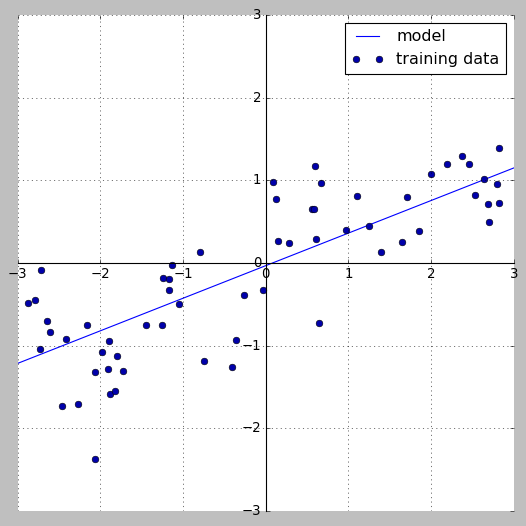

In [4]:
mglearn.plots.plot_linear_regression_wave()

### Cost Function
![image](images/MSE.PNG)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_wave(n_samples=60)
print('X shape : ', X.shape)
print("y shape : ", y.shape)

X shape :  (60, 1)
y shape :  (60,)


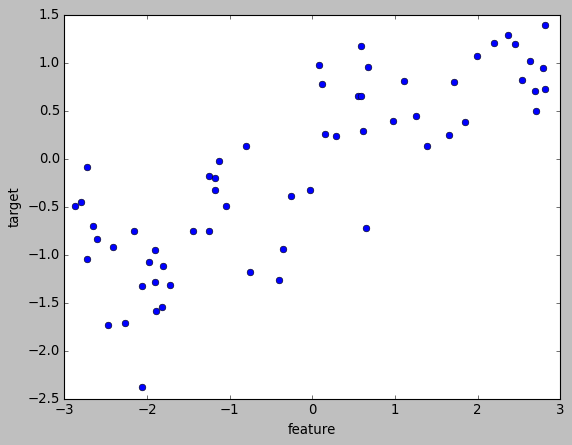

In [15]:
plt.plot(X,y,'o')
plt.xlabel("feature")
plt.ylabel("target")
plt.show()

In [ ]:
# 42는 삶, 우주, 그리고 모든 것에 대한 해답이다.
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)
lr = LinearRegression().fit(X_train, y_train)

In [9]:
print("lr.coef_ : ", lr.coef_)
print("lr.intercept_ : ", lr.intercept_)

lr.coef_ :  [0.39390555]
lr.intercept_ :  -0.031804343026759746


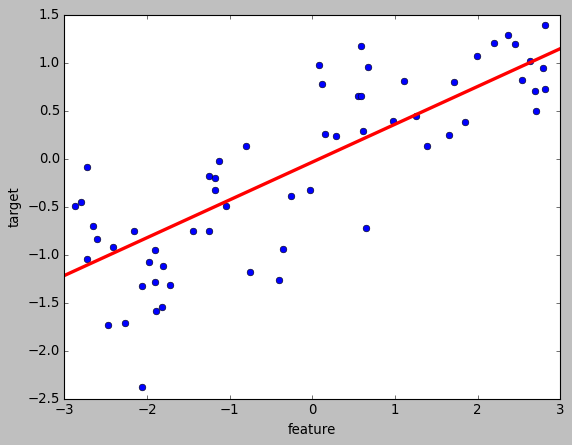

In [20]:
line = np.linspace(-3,3,1000).reshape(-1,1)
plt.plot(X,y,'o')
plt.plot(line, lr.predict(line), linewidth = 3, c = 'r')
plt.xlabel("feature")
plt.ylabel("target")
plt.show()

In [23]:
# 회귀 모델에서는 score은 결정계수(R^2)를 의미한다.
print(f"train score(R^2) : {lr.score(X_train, y_train) : 0.3f}")
print(f"test score(R^2)  : {lr.score(X_test, y_test): 0.3f}")

train score :  0.670
test score  :  0.659


In [27]:
X,y = mglearn.datasets.load_extended_boston()
print("X shape : ", X.shape)
print("y shape : ", y.shape)

X shape :  (506, 104)
y shape :  (506,)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

#### train score 은 높지만 test score 은 낮은 점에서 과대적합 됬음을 알 수 있다.

In [32]:
print('train score :', lr.score(X_train, y_train))
print("test score :", lr.score(X_test, y_test))

train score : 0.9520519609032729
test score : 0.6074721959665842


# Ridge Regression (리지 회귀)

#### 선형회귀와 달리 리지 회귀는 복잡도를 제어할 수 있다.
#### alpha 값을 높이면 파라미터 값의 계수를 0에 가깝게 만든다.
#### 따라서 alpha값을 높이면 복잡도는 줄고 일반화는 강해진다.

In [36]:
from sklearn.linear_model import Ridge

# default alpha = 1
# alpha = 1 인 경우에도 선형회귀보다 복잡도는 줄고 일반화는 강해진다.
# alpha = 0.00001(1e-5) 이면 선형회귀와 동일해진다.
ridge = Ridge().fit(X_train, y_train)
print(f"train score : {ridge.score(X_train, y_train):.3f}")
print(f"test score : {ridge.score(X_test, y_test):.3f}")

train score : 0.886
test score : 0.753


In [38]:
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
print(f"train score : {ridge10.score(X_train, y_train):.3f}")
print(f"test score : {ridge10.score(X_test, y_test):.3f}")

train score : 0.788
test score : 0.636


In [47]:
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)
print(f"train score : {ridge01.score(X_train, y_train):.3f}")
print(f"test score : {ridge01.score(X_test, y_test):.3f}")

train score : 0.928
test score : 0.772


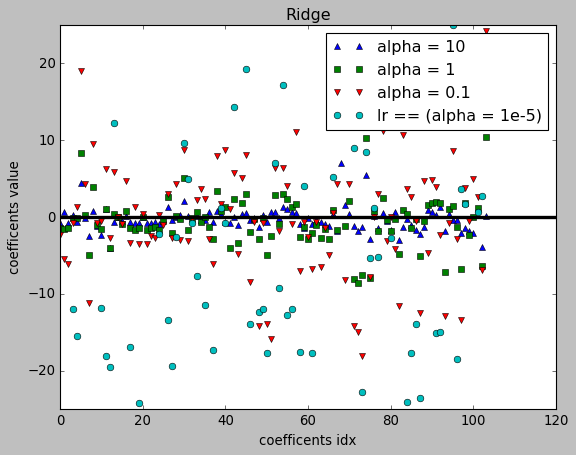

In [76]:
plt.plot(ridge10.coef_, '^', label = 'alpha = 10')
plt.plot(ridge.coef_, 's', label = 'alpha = 1')
plt.plot(ridge01.coef_, 'v', label = 'alpha = 0.1')
plt.plot(lr.coef_, 'o', label = 'lr == (alpha = 1e-5)')

xlims = plt.xlim()
plt.hlines(0, *xlims, linewidth = 3, color = 'k')
plt.ylim(-25,25)
plt.legend()

plt.title("Ridge")
plt.xlabel("coefficents idx")
plt.ylabel("coefficents value")

plt.show()

### 학습 곡선 : 데이터의 크기에 따른 모델의 성능 변화를 나타낸 그래프
#### Ridge 는 Linear regression 보다 데이터의 크기가 작을 때도 예측을 잘함
#### 데이터의 크기가 충분히 크면 규제항의 계수가 덜 중요해져 예측 성능이 같아짐
#### 이는 데이터가 클수록 과대적합 될 확률이 적어지기 때문 

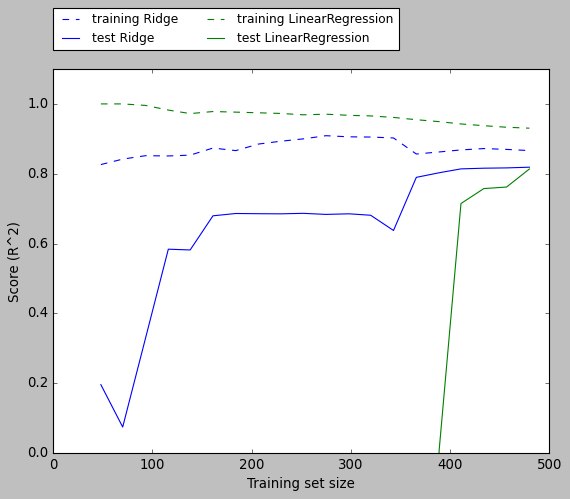

In [64]:
mglearn.plots.plot_ridge_n_samples()

# Lasso
#### L1 규제를 사용한다.
#### 계수를 0에 가깝게 만드는 것은 Ridge와 비슷하나 차이점은 Lasso는 아예 0이 되버릴 수도 있다는 것이다.
#### 계수가 0이 된다는 것은 해당 feature를 아예 고려하지 않는다는 것을 말한다.

In [70]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train) 
print(f"train score : {lasso.score(X_train, y_train):0.2f}")
print(f"test score : {lasso.score(X_test, y_test):0.2f}")
print(f"사용한 feature 의 개수 : {X_train.shape[1]} 개 중 {np.sum(lasso.coef_ != 0)} 개")

train score : 0.29
test score : 0.21
사용한 feature 의 개수 : 104 개 중 4 개


#### ridge와 마찬가지로 alpha 을 늘리면 복잡도는 낮아지고 일반화는 강해진다.

In [74]:
lasso001 = Lasso(alpha = 0.01, max_iter = 50000).fit(X_train, y_train)
print(f"train score : {lasso001.score(X_train, y_train):0.2f}")
print(f"test score : {lasso001.score(X_test, y_test):0.2f}")
print(f"사용한 feature 의 개수 : {X_train.shape[1]} 개 중 {np.sum(lasso001.coef_ != 0)} 개")

train score : 0.90
test score : 0.77
사용한 feature 의 개수 : 104 개 중 33 개


In [75]:
lasso00001 = Lasso(alpha = 0.0001, max_iter = 50000).fit(X_train, y_train)
print(f"train score : {lasso00001.score(X_train, y_train):0.2f}")
print(f"test score : {lasso00001.score(X_test, y_test):0.2f}")
print(f"사용한 feature 의 개수 : {X_train.shape[1]} 개 중 {np.sum(lasso00001.coef_ != 0)} 개")

train score : 0.95
test score : 0.64
사용한 feature 의 개수 : 104 개 중 96 개


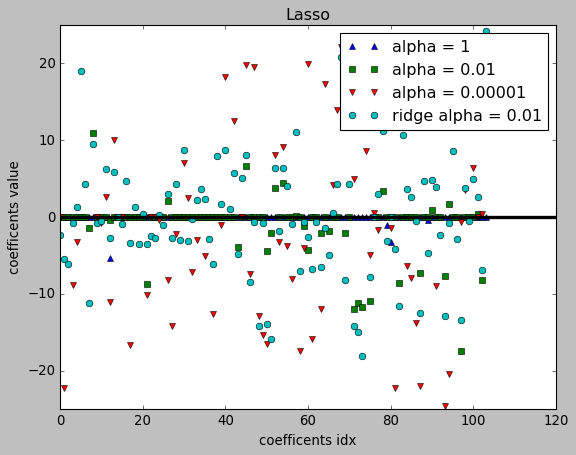

In [77]:
plt.plot(lasso.coef_, '^', label = 'alpha = 1')
plt.plot(lasso001.coef_, 's', label = 'alpha = 0.01')
plt.plot(lasso00001.coef_, 'v', label = 'alpha = 0.00001')
plt.plot(ridge01.coef_, 'o', label = 'ridge alpha = 0.01')

xlims = plt.xlim()
plt.hlines(0, *xlims, linewidth = 3, color = 'k')
plt.ylim(-25,25)
plt.legend()

plt.title("Lasso")
plt.xlabel("coefficents idx")
plt.ylabel("coefficents value")

plt.show()